## Setup

In [1]:
%run setup.ipynb

In [2]:
ihs_raw = phase1_selection.ihs_raw
ihs_raw

Group(/, 5)
  groups: 5; 2L, 2R, 3L, 3R, X
  store: DirectoryStore

## Windowing

### 2R

In [3]:
grp = ihs_raw['2R/BFS']
grp

Group(/2R/BFS, 7)
  arrays: 7; AC, AF, CHROM, POS, iHS, iHS_chrom_std, iHS_gw_std
  store: DirectoryStore

In [4]:
pos = grp['POS'][:]
ihs_signed = grp['iHS_gw_std'][:]
ihs_abs = np.abs(grp['iHS_gw_std'][:])

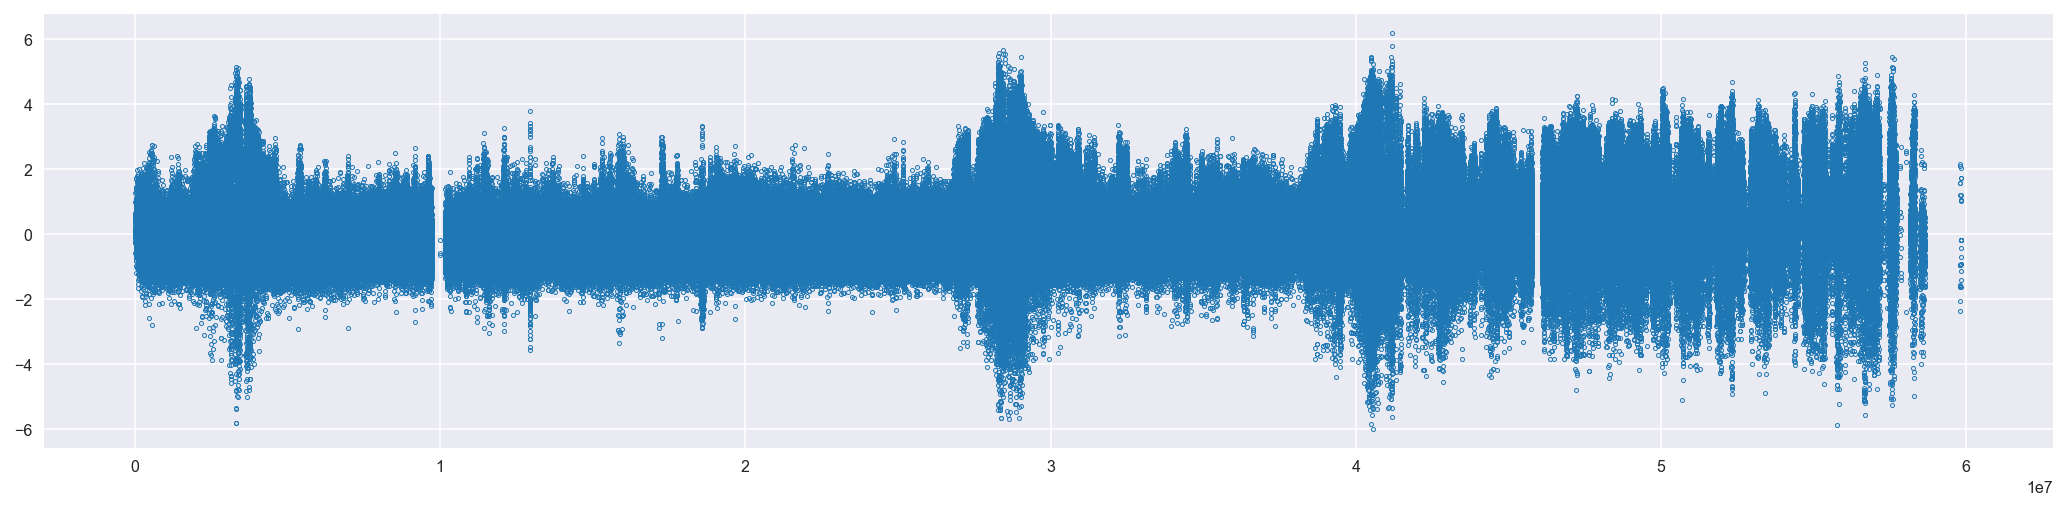

In [62]:
fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(pos, ihs_signed, marker='o', linestyle=' ', markersize=2, mfc='none', mew=.5);

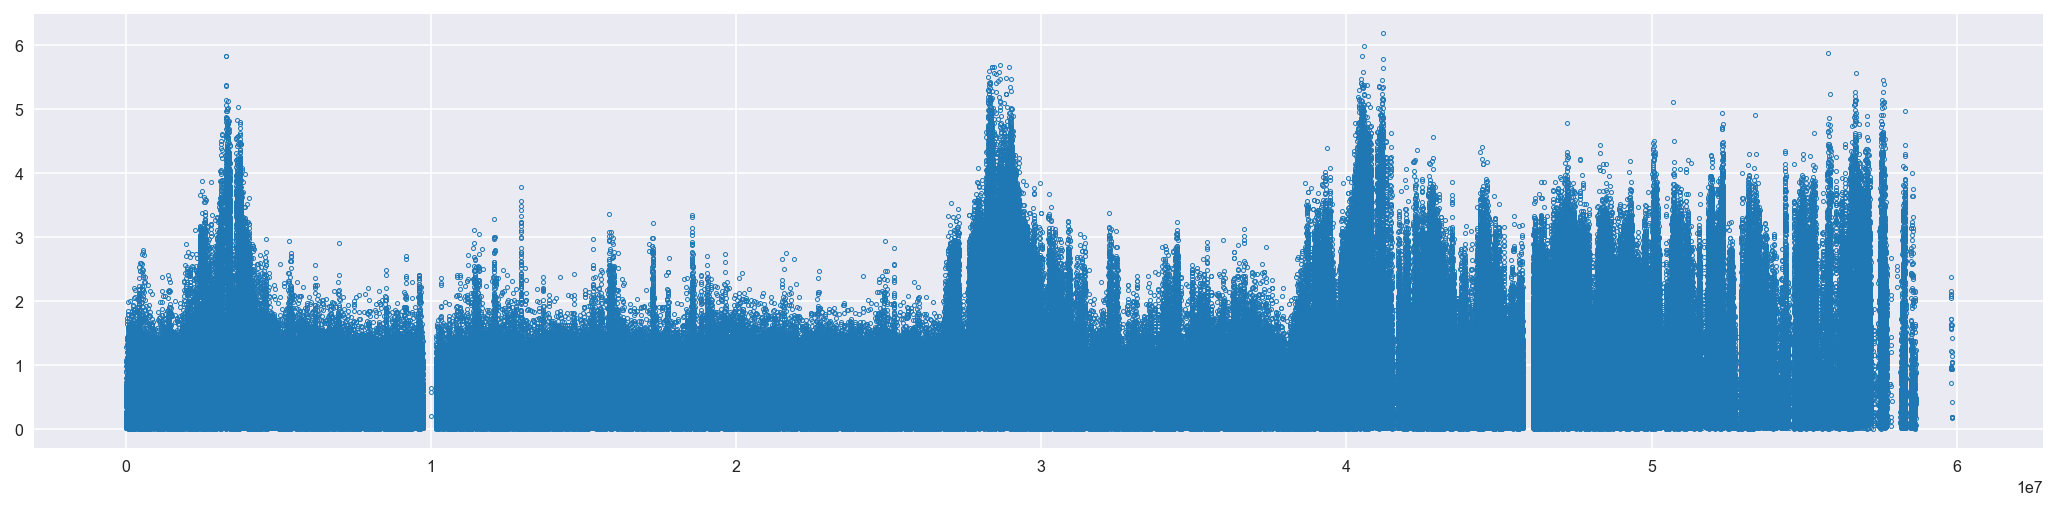

In [63]:
fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(pos, ihs_abs, marker='o', linestyle=' ', markersize=2, mfc='none', mew=.5);

In [5]:
windows = allel.stats.window.position_windows(pos, size=20000, start=1, stop=len(genome['2R']), step=20000)
windows

array([[       1,    20000],
       [   20001,    40000],
       [   40001,    60000],
       ..., 
       [61500001, 61520000],
       [61520001, 61540000],
       [61540001, 61545105]])

In [6]:
wx = (windows[:, 0] + windows[:, 1]) / 2
wy, _, _ = allel.windowed_statistic(pos, ihs_abs, statistic=np.nanmax, windows=windows)

/home/aliman/src/github/malariagen/agam-selection-atlas/deps/conda/envs/agam-selection-atlas/lib/python3.6/site-packages/allel/stats/window.py:366: RuntimeWarning: All-NaN slice encountered
  s = statistic(wv)


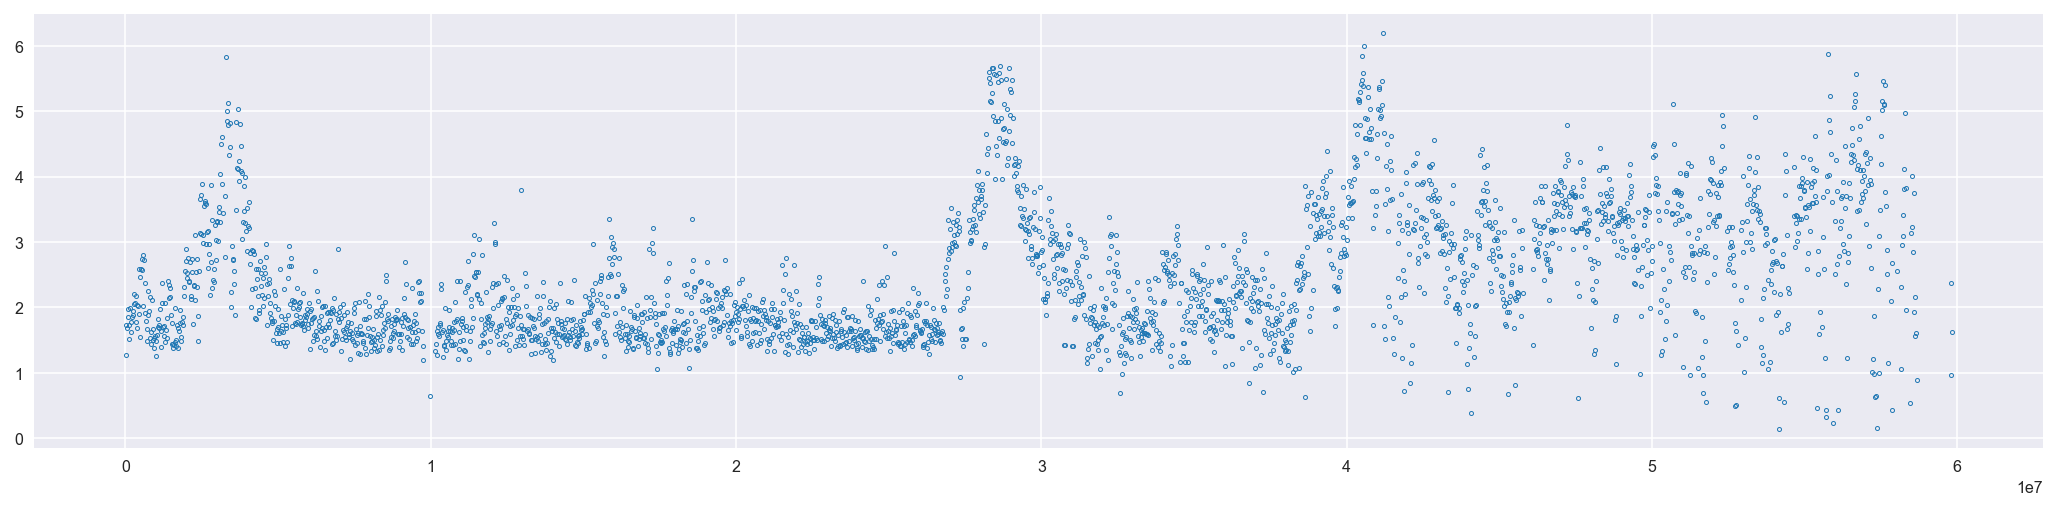

In [7]:
fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(wx, wy, marker='o', linestyle=' ', markersize=2, mfc='none', mew=.5);

In [10]:
wy5, _, _ = allel.windowed_statistic(pos, ihs_abs, statistic=np.nanstd, windows=windows)

/home/aliman/src/github/malariagen/agam-selection-atlas/deps/conda/envs/agam-selection-atlas/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


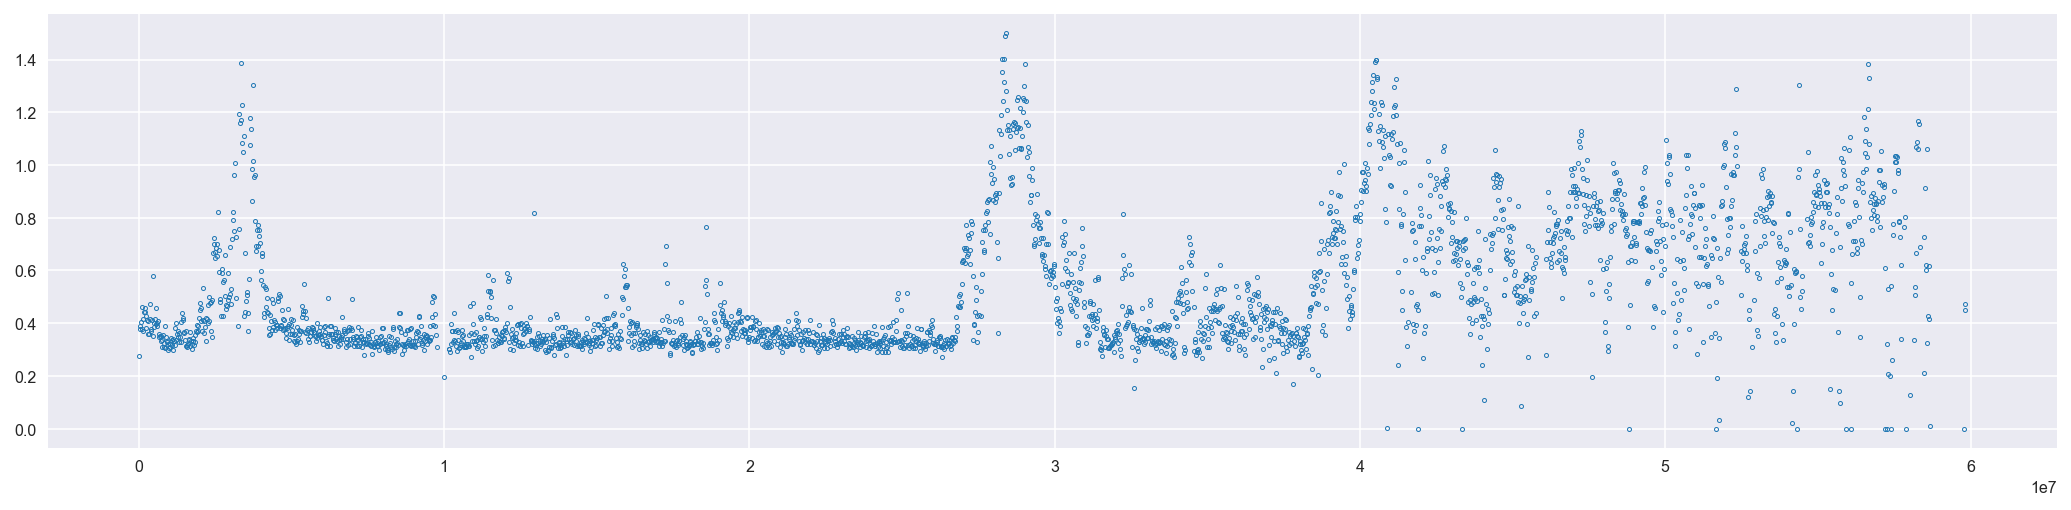

In [11]:
fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(wx, wy5, marker='o', linestyle=' ', markersize=2, mfc='none', mew=.5);

In [12]:
# This fits each flank independently and returns delta AIC as minimum of the two 
# flanks - better at excluding edge effects.
pairexp_fitter = rockies.PairExponentialPeakFitter(
    amplitude=lmfit.Parameter(value=8, vary=True, min=0),
    decay=lmfit.Parameter(value=2e5, vary=True, min=5e4),
    c=lmfit.Parameter(value=2, vary=True, min=0, max=5),
    cap=lmfit.Parameter(value=5, vary=True)
)

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 104
    # data points      = 198
    # variables        = 4
    chi-square         = 55.140
    reduced chi-square = 0.284
    Akaike info crit   = -245.121
    Bayesian info crit = -231.968
[[Variables]]
    amplitude:   4.35925419 +/- 0.309130 (7.09%) (init= 8)
    decay:       6.8263e+05 +/- 7.45e+04 (10.92%) (init= 200000)
    c:           1.70434268 +/- 0.068033 (3.99%) (init= 2)
    cap:         5.05320223 +/- 0.188489 (3.73%) (init= 5)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, decay)          = -0.745 
    C(decay, c)                  = -0.710 
    C(amplitude, c)              =  0.252 

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 80
    # data points      = 199
    # variables        = 4
    chi-square         = 50.990
    reduced chi-square = 0.261
    Akaike info crit   = -262.973
    Bayesian info crit = -249.799
[[Variables]]
    ampli

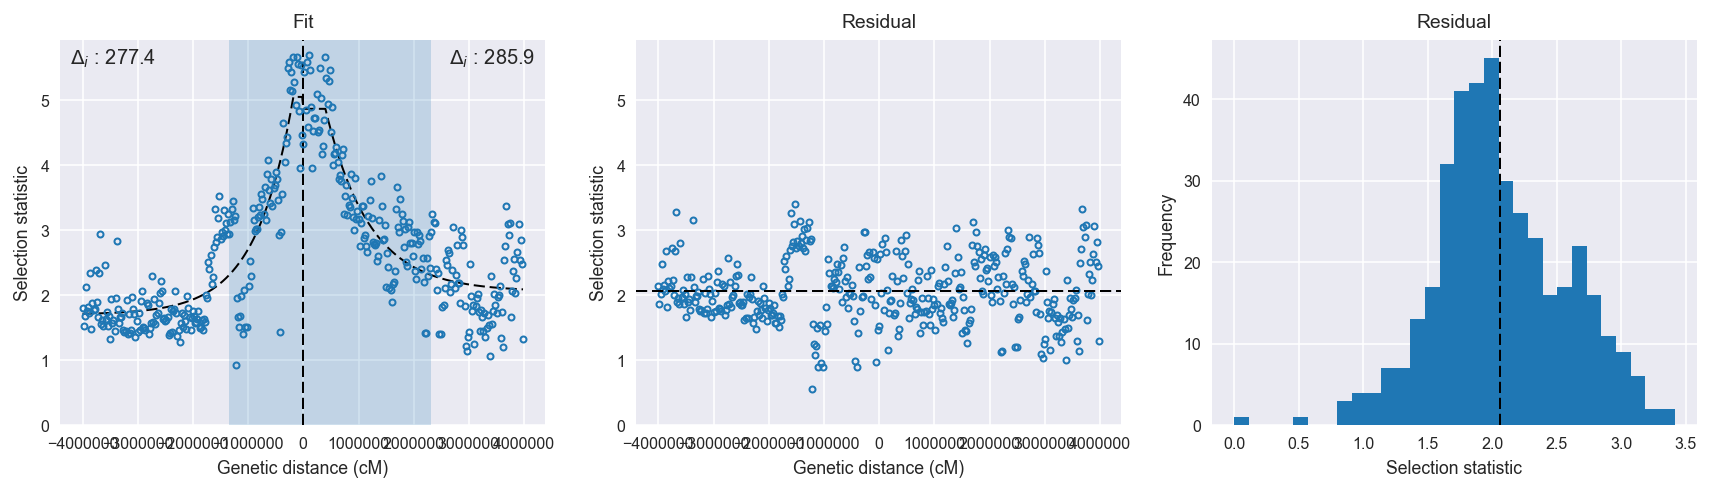

In [14]:
missing = np.isnan(wy)
x, y, center, flank = wx[~missing], wy[~missing], 2.855e7, 4e6
fit = pairexp_fitter.fit(x, y, center, flank)
rockies.plot_peak(fit)
print(fit.peak_result[0].fit_report())
print(fit.peak_result[1].fit_report())
print(fit.null_result[0].fit_report())
print(fit.null_result[1].fit_report())

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 39
    # data points      = 168
    # variables        = 4
    chi-square         = 39.163
    reduced chi-square = 0.239
    Akaike info crit   = -236.645
    Bayesian info crit = -224.149
[[Variables]]
    amplitude:   3.02016093 +/- 0        (0.00%) (init= 8)
    decay:       7.0802e+05 +/- 0        (0.00%) (init= 200000)
    c:           1.77935876 +/- 0        (0.00%) (init= 2)
    cap:         4.81695003 +/- 0        (0.00%) (init= 5)

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 43
    # data points      = 200
    # variables        = 4
    chi-square         = 40.210
    reduced chi-square = 0.205
    Akaike info crit   = -312.839
    Bayesian info crit = -299.646
[[Variables]]
    amplitude:   5.48081082 +/- 1.636221 (29.85%) (init= 8)
    decay:       4.2173e+05 +/- 8.08e+04 (19.16%) (init= 200000)
    c:           1.80870283 +/- 0.047212 (2.61%) (init= 2)
    cap:    

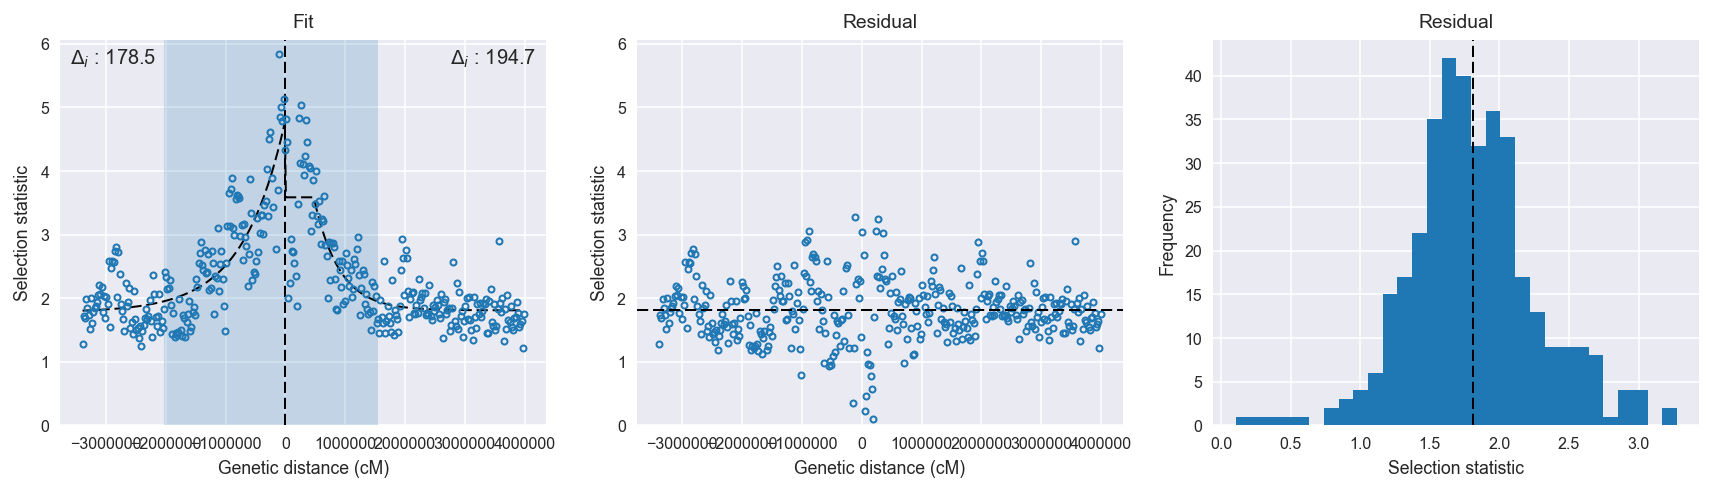

In [16]:
missing = np.isnan(wy)
x, y, center, flank = wx[~missing], wy[~missing], 3.4e6, 4e6
fit = pairexp_fitter.fit(x, y, center, flank)
rockies.plot_peak(fit)
print(fit.peak_result[0].fit_report())
print(fit.peak_result[1].fit_report())
print(fit.null_result[0].fit_report())
print(fit.null_result[1].fit_report())

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 70
    # data points      = 168
    # variables        = 4
    chi-square         = 1.847
    reduced chi-square = 0.011
    Akaike info crit   = -749.792
    Bayesian info crit = -737.296
[[Variables]]
    amplitude:   0.78585742 +/- 0        (0.00%) (init= 8)
    decay:       4.3086e+05 +/- 0        (0.00%) (init= 200000)
    c:           0.37075903 +/- 0        (0.00%) (init= 2)
    cap:         1.16010328 +/- 0        (0.00%) (init= 5)

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 134
    # data points      = 200
    # variables        = 4
    chi-square         = 2.559
    reduced chi-square = 0.013
    Akaike info crit   = -863.710
    Bayesian info crit = -850.516
[[Variables]]
    amplitude:   0.63090285 +/- 0.083579 (13.25%) (init= 8)
    decay:       8.5427e+05 +/- 1.71e+05 (20.05%) (init= 200000)
    c:           0.31396565 +/- 0.019498 (6.21%) (init= 2)
    cap:     

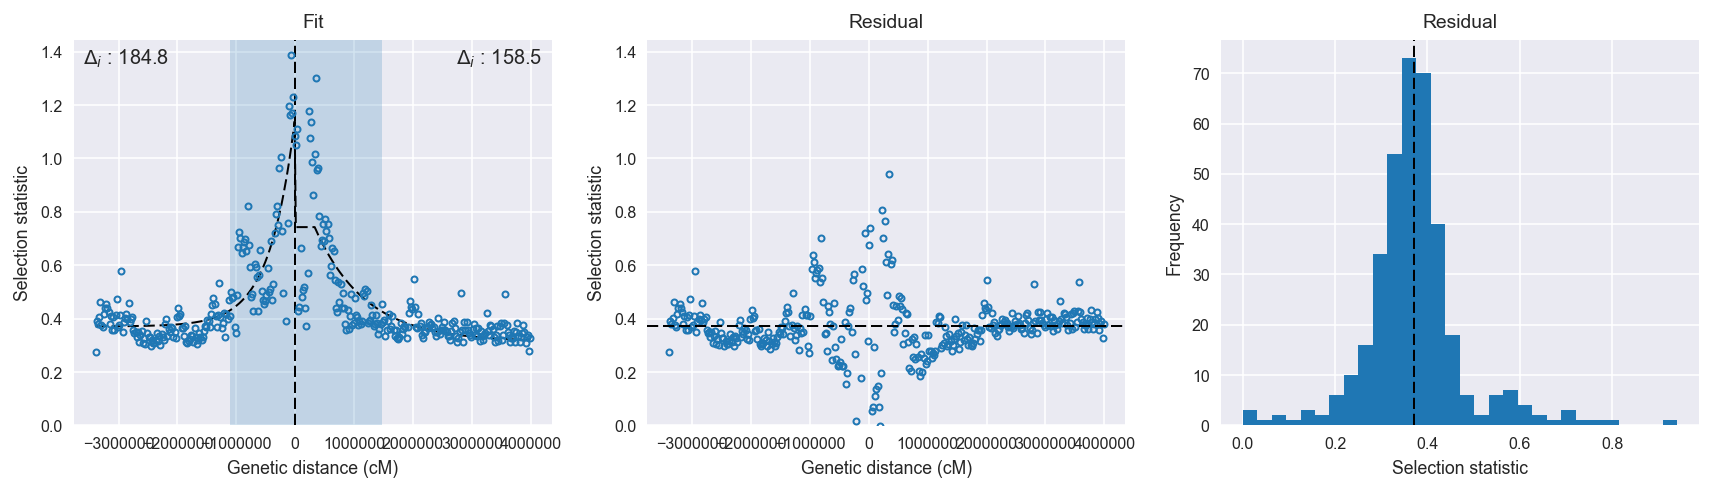

In [17]:
missing = np.isnan(wy5)
x, y, center, flank = wx[~missing], wy5[~missing], 3.4e6, 4e6
fit = pairexp_fitter.fit(x, y, center, flank)
rockies.plot_peak(fit)
print(fit.peak_result[0].fit_report())
print(fit.peak_result[1].fit_report())
print(fit.null_result[0].fit_report())
print(fit.null_result[1].fit_report())

### 2L

In [18]:
ihs_raw['2L']

Group(/2L, 10)
  groups: 10; AOM, BFM, BFS, CMS, CMS_savanna, GAS, GNS, GWA, KES, UGS
  store: DirectoryStore

In [19]:
grp = ihs_raw['2L/BFS']
grp

Group(/2L/BFS, 7)
  arrays: 7; AC, AF, CHROM, POS, iHS, iHS_chrom_std, iHS_gw_std
  store: DirectoryStore

In [20]:
pos = grp['POS'][:]
ihs_signed = grp['iHS_gw_std'][:]
ihs = np.abs(grp['iHS_gw_std'][:])

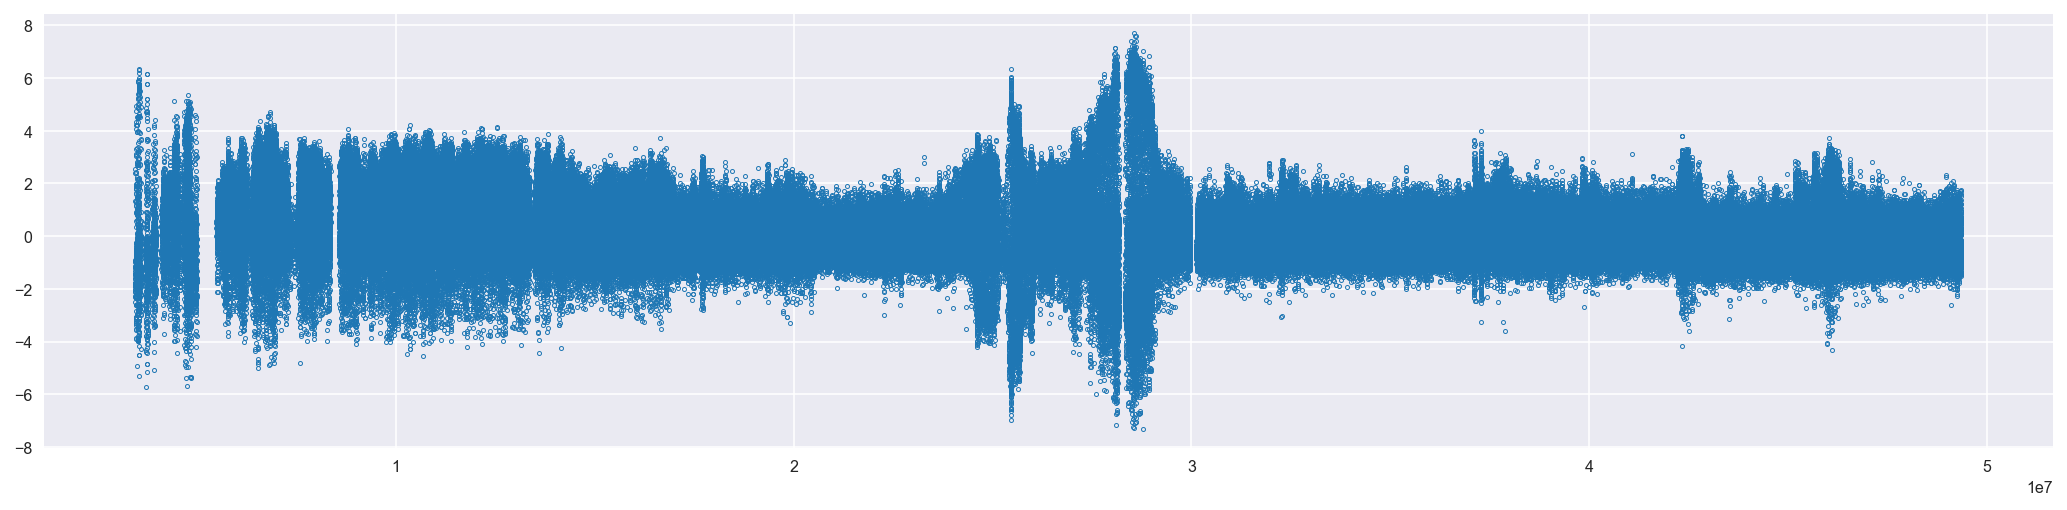

In [55]:
fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(pos, ihs_signed, marker='o', linestyle=' ', markersize=2, mfc='none', mew=.5);

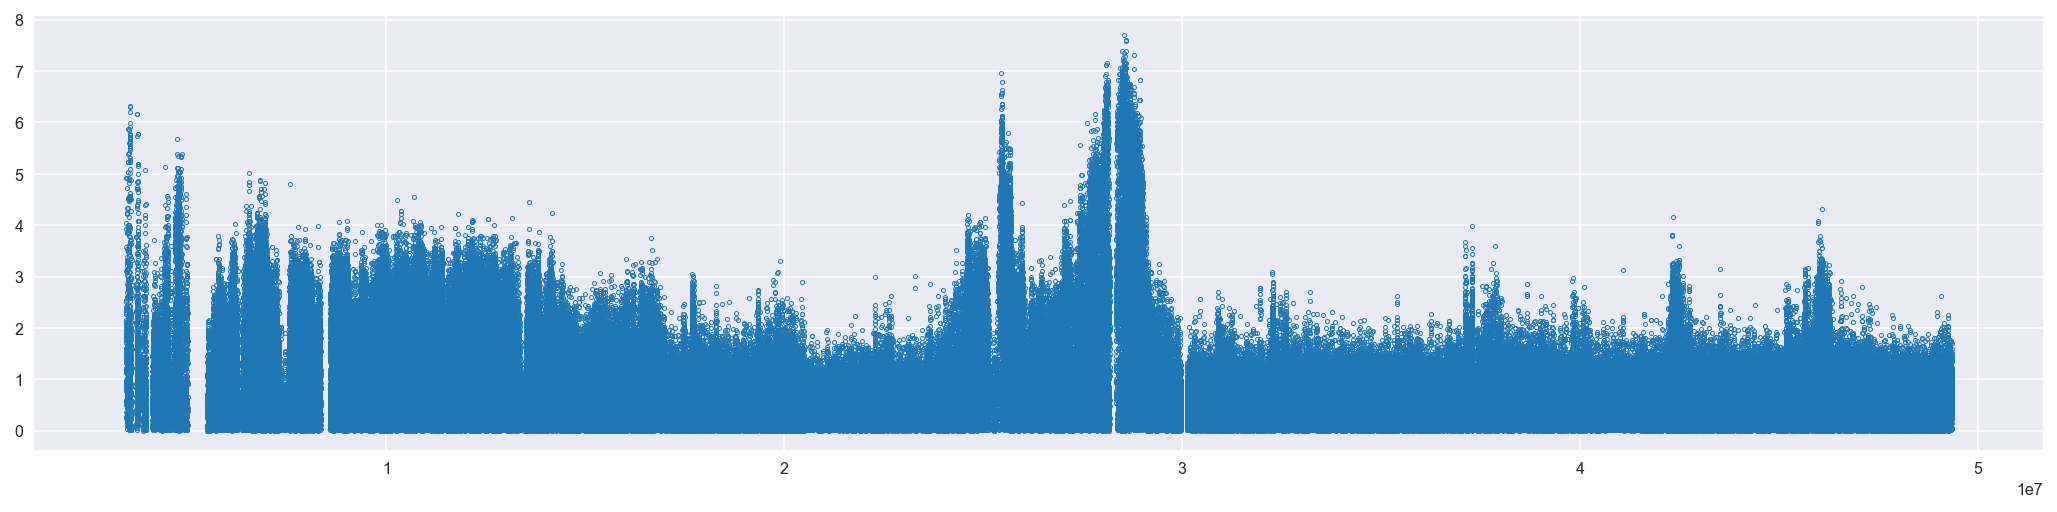

In [21]:
fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(pos, ihs, marker='o', linestyle=' ', markersize=2, mfc='none', mew=.5);

In [13]:
genome = phase1_ar3.genome

In [22]:
windows = allel.stats.window.position_windows(pos, size=20000, start=1, stop=len(genome['2L']), step=20000)
windows

array([[       1,    20000],
       [   20001,    40000],
       [   40001,    60000],
       ..., 
       [49320001, 49340000],
       [49340001, 49360000],
       [49360001, 49364325]])

In [23]:
wx = (windows[:, 0] + windows[:, 1]) / 2
wy, _, _ = allel.windowed_statistic(pos, ihs, statistic=np.nanmax, windows=windows)

/home/aliman/src/github/malariagen/agam-selection-atlas/deps/conda/envs/agam-selection-atlas/lib/python3.6/site-packages/allel/stats/window.py:366: RuntimeWarning: All-NaN slice encountered
  s = statistic(wv)


In [24]:
def nanpc(v, p):
    notnan = ~np.isnan(v)
    if np.any(notnan):
        return np.percentile(v[notnan], p)
    else:
        return np.nan

In [25]:
# wy2, _, _ = allel.windowed_statistic(pos, ihs, statistic=lambda v: nanpc(v, 90), windows=windows)

In [26]:
# wy3, _, _ = allel.windowed_statistic(pos, ihs, statistic=lambda v: nanpc(v, 50), windows=windows)

In [27]:
wy4, _, _ = allel.windowed_statistic(pos, ihs_signed, statistic=np.nanstd, windows=windows)

/home/aliman/src/github/malariagen/agam-selection-atlas/deps/conda/envs/agam-selection-atlas/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [28]:
wy5, _, _ = allel.windowed_statistic(pos, ihs, statistic=np.nanstd, windows=windows)

/home/aliman/src/github/malariagen/agam-selection-atlas/deps/conda/envs/agam-selection-atlas/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


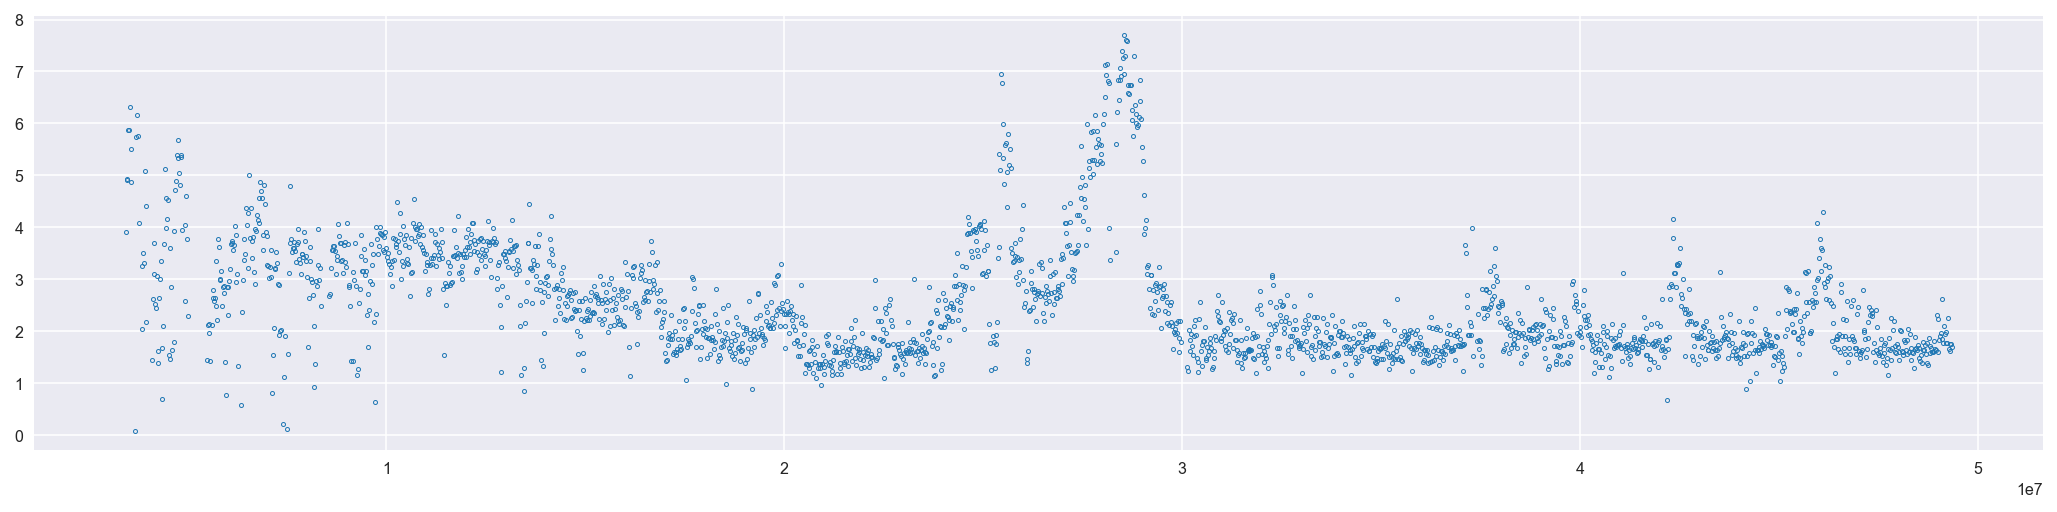

In [29]:
fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(wx, wy, marker='o', linestyle=' ', markersize=2, mfc='none', mew=.5);

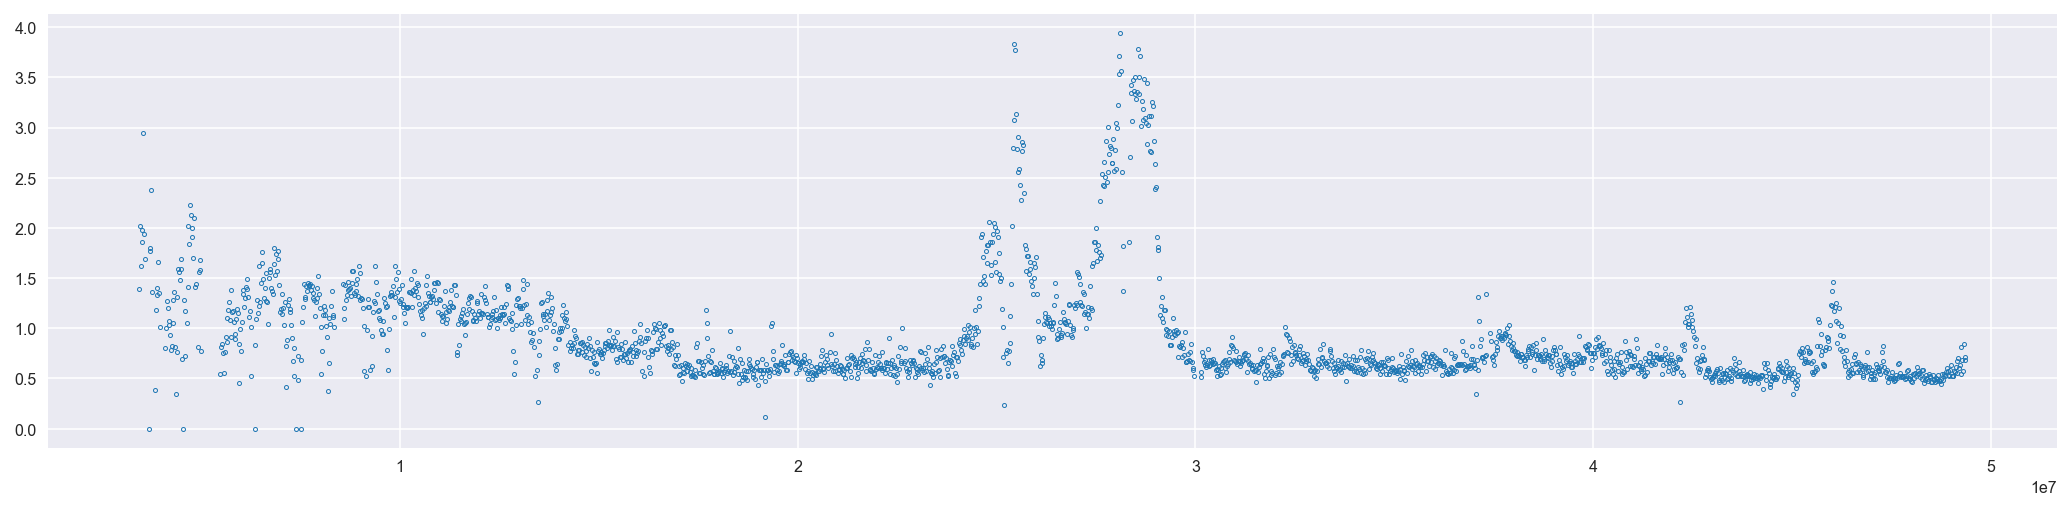

In [31]:
fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(wx, wy4, marker='o', linestyle=' ', markersize=2, mfc='none', mew=.5);

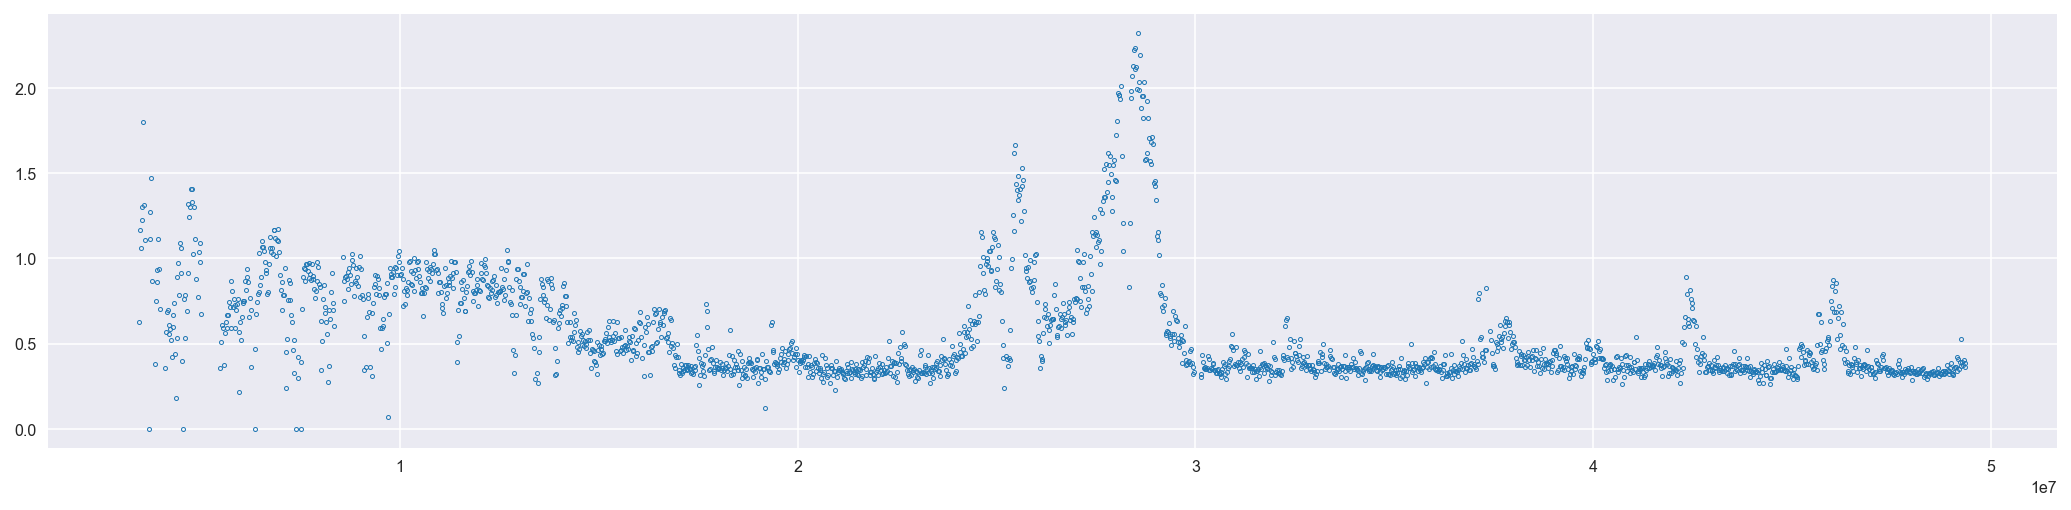

In [32]:
fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(wx, wy5, marker='o', linestyle=' ', markersize=2, mfc='none', mew=.5);

In [33]:
# This fits each flank independently and returns delta AIC as minimum of the two 
# flanks - better at excluding edge effects.
pairexp_fitter = rockies.PairExponentialPeakFitter(
    amplitude=lmfit.Parameter(value=8, vary=True, min=0),
    decay=lmfit.Parameter(value=2e5, vary=True, min=5e4),
    c=lmfit.Parameter(value=2, vary=True, min=1, max=5),
    cap=lmfit.Parameter(value=5, vary=True)
)

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 75
    # data points      = 144
    # variables        = 4
    chi-square         = 133.306
    reduced chi-square = 0.952
    Akaike info crit   = -3.112
    Bayesian info crit = 8.767
[[Variables]]
    amplitude:   4.49425146 +/- 0.545815 (12.14%) (init= 8)
    decay:       7.5997e+05 +/- 1.84e+05 (24.22%) (init= 200000)
    c:           3.04928655 +/- 0.223538 (7.33%) (init= 2)
    cap:         6.91469375 +/- 0.398368 (5.76%) (init= 5)
[[Correlations]] (unreported correlations are <  0.100)
    C(decay, c)                  = -0.848 
    C(amplitude, decay)          = -0.623 
    C(amplitude, c)              =  0.233 

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 109
    # data points      = 143
    # variables        = 4
    chi-square         = 23.975
    reduced chi-square = 0.172
    Akaike info crit   = -247.372
    Bayesian info crit = -235.520
[[Variables]]
    amplitud

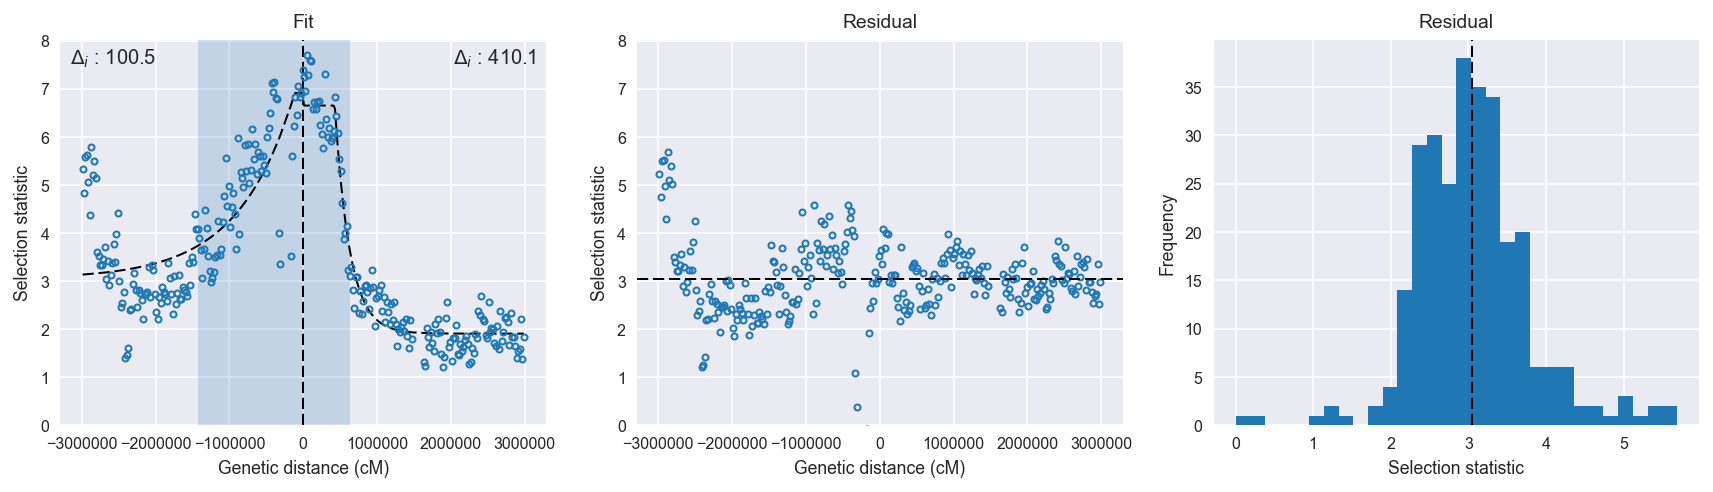

In [34]:
missing = np.isnan(wy)
x, y, center, flank = wx[~missing], wy[~missing], 2.85e7, 3e6
fit = pairexp_fitter.fit(x, y, center, flank)
rockies.plot_peak(fit)
print(fit.peak_result[0].fit_report())
print(fit.peak_result[1].fit_report())
print(fit.null_result[0].fit_report())
print(fit.null_result[1].fit_report())

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 51
    # data points      = 144
    # variables        = 3
    chi-square         = 109.467
    reduced chi-square = 0.776
    Akaike info crit   = -33.484
    Bayesian info crit = -24.575
[[Variables]]
    amplitude:   4.22756080 +/- 0.325512 (7.70%) (init= 8)
    decay:       7.1230e+05 +/- 1.23e+05 (17.30%) (init= 200000)
    c:           2.15559706 +/- 0.169399 (7.86%) (init= 2)
    cap:         inf (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(decay, c)                  = -0.813 
    C(amplitude, decay)          = -0.316 
    C(amplitude, c)              = -0.113 

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 41
    # data points      = 143
    # variables        = 3
    chi-square         = 30.308
    reduced chi-square = 0.216
    Akaike info crit   = -215.854
    Bayesian info crit = -206.965
[[Variables]]
    amplitude:   6.40467224 +/- 0.187760 

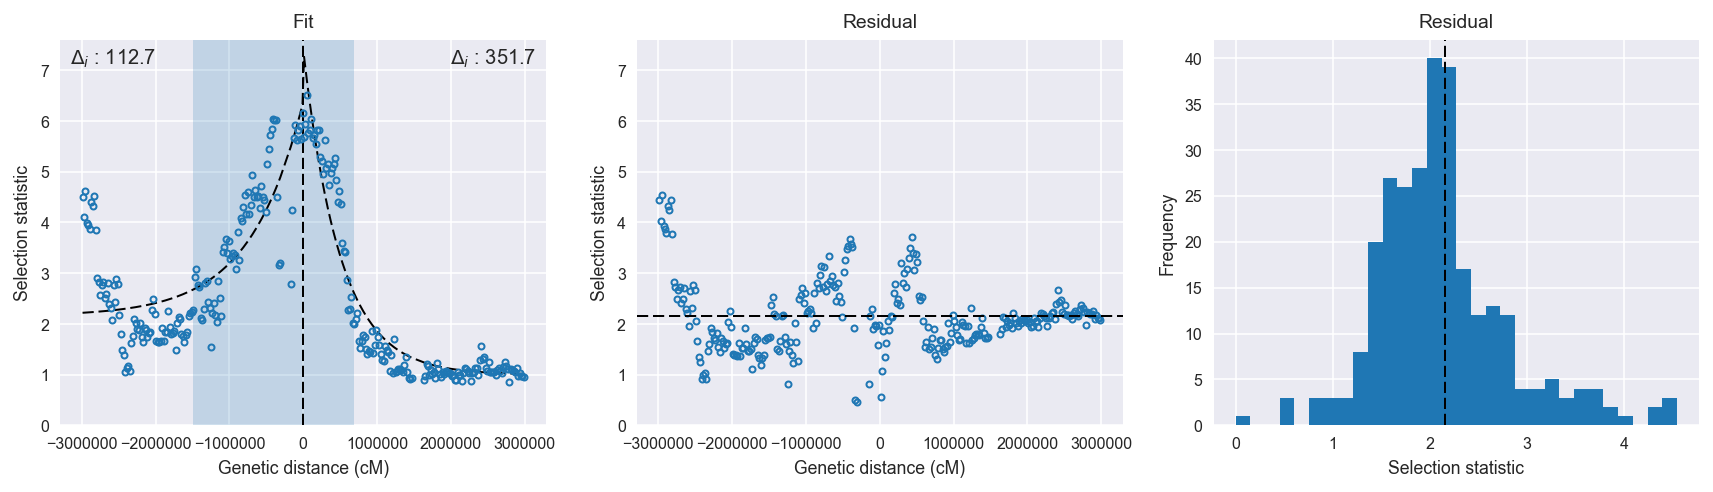

In [44]:
missing = np.isnan(wy2)
x, y, center, flank = wx[~missing], wy2[~missing], 2.85e7, 3e6
fit = pairexp_fitter.fit(x, y, center, flank)
rockies.plot_peak(fit)
print(fit.peak_result[0].fit_report())
print(fit.peak_result[1].fit_report())
print(fit.null_result[0].fit_report())
print(fit.null_result[1].fit_report())

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 84
    # data points      = 147
    # variables        = 3
    chi-square         = 63.521
    reduced chi-square = 0.441
    Akaike info crit   = -117.342
    Bayesian info crit = -108.370
[[Variables]]
    amplitude:   2.44295986 +/- 0.761544 (31.17%) (init= 8)
    decay:       2.2529e+06 +/- 1.48e+06 (65.50%) (init= 200000)
    c:           1          +/- 1.879910 (187.99%) (init= 2)
    cap:         inf (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(decay, c)                  =  0.984 
    C(amplitude, c)              =  0.980 
    C(amplitude, decay)          =  0.937 

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 35
    # data points      = 144
    # variables        = 3
    chi-square         = 241.943
    reduced chi-square = 1.716
    Akaike info crit   = 80.720
    Bayesian info crit = 89.629
[[Variables]]
    amplitude:   2.96434694 +/- 0.979673

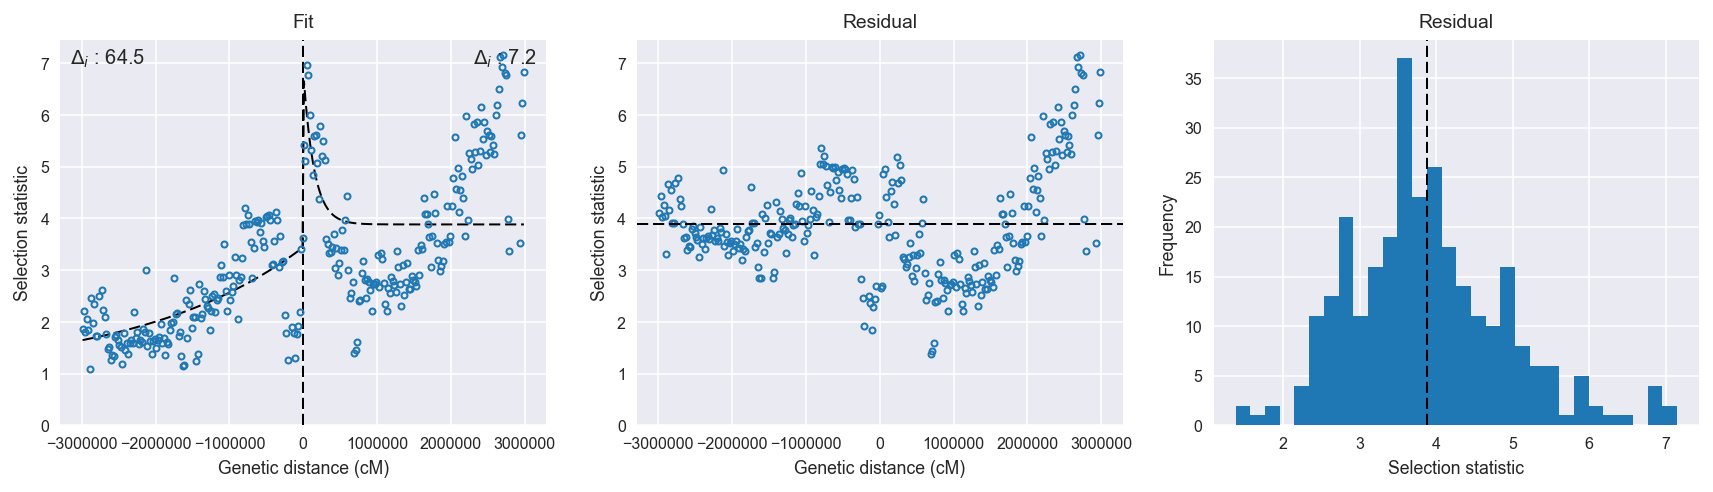

In [34]:
missing = np.isnan(wy)
x, y, center, flank = wx[~missing], wy[~missing], 2.54e7, 3e6
fit = pairexp_fitter.fit(x, y, center, flank)
rockies.plot_peak(fit)
print(fit.peak_result[0].fit_report())
print(fit.peak_result[1].fit_report())
print(fit.null_result[0].fit_report())
print(fit.null_result[1].fit_report())

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 116
    # data points      = 150
    # variables        = 4
    chi-square         = 20.470
    reduced chi-square = 0.140
    Akaike info crit   = -290.752
    Bayesian info crit = -278.709
[[Variables]]
    amplitude:   7.44762843 +/- 7.557748 (101.48%) (init= 8)
    decay:       50000.0010 +/- 2.55e+03 (5.09%) (init= 200000)
    c:           1.82335240 +/- 0.032124 (1.76%) (init= 2)
    cap:         3.55359008 +/- 0.187219 (5.27%) (init= 5)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, decay)          =  0.974 
    C(decay, c)                  =  0.190 
    C(amplitude, c)              =  0.143 

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 33
    # data points      = 150
    # variables        = 4
    chi-square         = 17.808
    reduced chi-square = 0.122
    Akaike info crit   = -311.645
    Bayesian info crit = -299.602
[[Variables]]
    ampl

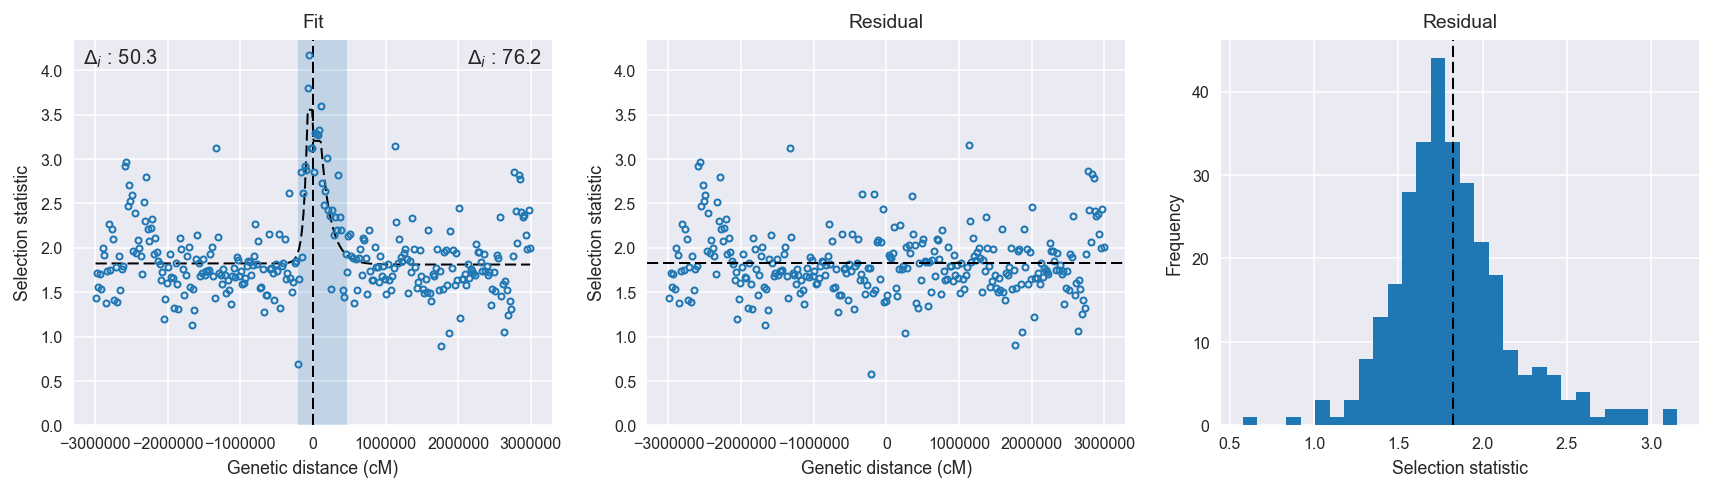

In [35]:
missing = np.isnan(wy)
x, y, center, flank = wx[~missing], wy[~missing], 4.24e7, 3e6
fit = pairexp_fitter.fit(x, y, center, flank)
rockies.plot_peak(fit)
print(fit.peak_result[0].fit_report())
print(fit.peak_result[1].fit_report())
print(fit.null_result[0].fit_report())
print(fit.null_result[1].fit_report())

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 50
    # data points      = 150
    # variables        = 3
    chi-square         = 4.253
    reduced chi-square = 0.029
    Akaike info crit   = -528.452
    Bayesian info crit = -519.420
[[Variables]]
    amplitude:   1.26128927 +/- 0.162115 (12.85%) (init= 8)
    decay:       90969.0230 +/- 1.70e+04 (18.72%) (init= 200000)
    c:           1.08601576 +/- 0.014819 (1.36%) (init= 2)
    cap:         inf (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, decay)          = -0.693 
    C(decay, c)                  = -0.255 

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 35
    # data points      = 150
    # variables        = 3
    chi-square         = 2.239
    reduced chi-square = 0.015
    Akaike info crit   = -624.674
    Bayesian info crit = -615.642
[[Variables]]
    amplitude:   1.25198909 +/- 0.098067 (7.83%) (init= 8)
    decay:       1.2876e+

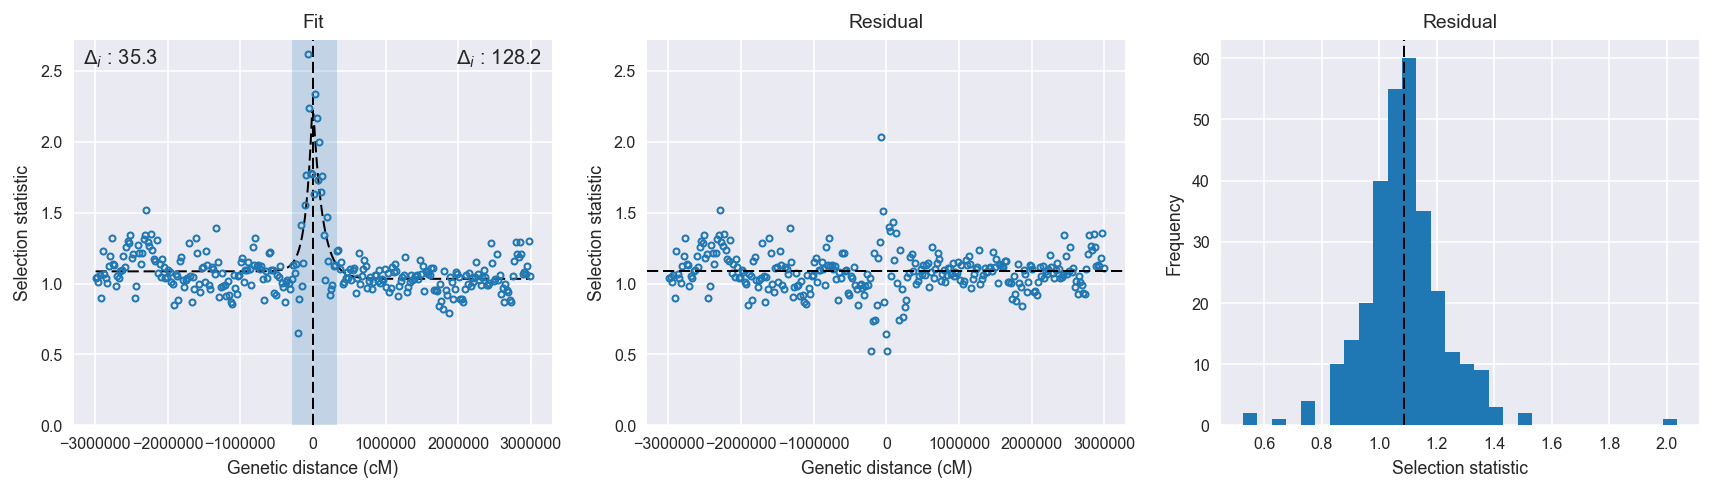

In [45]:
missing = np.isnan(wy2)
x, y, center, flank = wx[~missing], wy2[~missing], 4.24e7, 3e6
fit = pairexp_fitter.fit(x, y, center, flank)
rockies.plot_peak(fit)
print(fit.peak_result[0].fit_report())
print(fit.peak_result[1].fit_report())
print(fit.null_result[0].fit_report())
print(fit.null_result[1].fit_report())

## Legacy

In [2]:
# crude recombination rate lookup, keyed off chromatin state
# use units of cM / bp, assume 2 cM / Mbp == 2x10^-6 cm / bp
tbl_rr = (
    phase1_ar3.tbl_chromatin
    .addfield('rr', lambda row: .6e-6 if 'H' in row.name else 2e-6)
)    
tbl_rr.displayall()

0|name,1|chrom,2|start,3|stop,4|rr
CHX,X,20009764,24393108,6e-07
CH2R,2R,58984778,61545105,6e-07
CH2L,2L,1,2431617,6e-07
PEU2L,2L,2487770,5042389,2e-06
IH2L,2L,5078962,5788875,6e-07
IH3R,3R,38988757,41860198,6e-07
CH3R,3R,52161877,53200684,6e-07
CH3L,3L,1,1815119,6e-07
PEU3L,3L,1896830,4235209,2e-06
IH3L,3L,4264713,5031692,6e-07


In [3]:
genome = phase1_ar3.genome
chromosomes = '2R', '2L', '3R', '3L', 'X'

# per-base map of recombination rates
recmap = {chrom: np.full(len(genome[chrom]), fill_value=2e-6) for chrom in chromosomes}
for row in tbl_rr.records():
    recmap[row.chrom][row.start-1:row.stop] = row.rr
  
recmap

{'2L': array([  6.00000000e-07,   6.00000000e-07,   6.00000000e-07, ...,
          2.00000000e-06,   2.00000000e-06,   2.00000000e-06]),
 '2R': array([  2.00000000e-06,   2.00000000e-06,   2.00000000e-06, ...,
          6.00000000e-07,   6.00000000e-07,   6.00000000e-07]),
 '3L': array([  6.00000000e-07,   6.00000000e-07,   6.00000000e-07, ...,
          2.00000000e-06,   2.00000000e-06,   2.00000000e-06]),
 '3R': array([  2.00000000e-06,   2.00000000e-06,   2.00000000e-06, ...,
          6.00000000e-07,   6.00000000e-07,   6.00000000e-07]),
 'X': array([  2.00000000e-06,   2.00000000e-06,   2.00000000e-06, ...,
          6.00000000e-07,   6.00000000e-07,   6.00000000e-07])}

In [7]:
df_h12 = phase1_selection.hstats_windowed
df_h12.head(10)

AOM       BFM       BFS       CMS  GAS       GNS  \
chrom start  stop                                                       
2L    1      20000   NaN       NaN       NaN       NaN  NaN       NaN   
      20001  40000   NaN       NaN       NaN       NaN  NaN       NaN   
      40001  60000   NaN       NaN       NaN       NaN  NaN       NaN   
      60001  80000   NaN       NaN       NaN       NaN  NaN       NaN   
      80001  100000  NaN       NaN       NaN       NaN  NaN       NaN   
      100001 120000  NaN       NaN       NaN       NaN  NaN       NaN   
      120001 140000  NaN       NaN       NaN       NaN  NaN       NaN   
      140001 160000  NaN       NaN       NaN       NaN  NaN       NaN   
      160001 180000  NaN  0.431632  0.769395  0.093488  NaN  0.817898   
      180001 200000  NaN  0.481516  0.769242  0.106883  NaN  0.846514   

                          GWA       UGS  
chrom start  stop                        
2L    1      20000        NaN       NaN  
      20001  40000        NaN       NaN  
      40001  60000        NaN       NaN  
      60001  80000        NaN       NaN  
      80001  100000       NaN       NaN  
      100001 120000       NaN       NaN  
      120001 140000       NaN       NaN  
      140001 160000       NaN       NaN  
      160001 180000  0.049386  0.706240  
      180001 200000  0.049386  0.706146

In [4]:
df_ihs = phase1_selection.ihs_windowed
df_ihs.head(10)

AOM  BFM  BFS  CMS  GAS  GNS  GWA  KES  UGS
chrom start  stop                                               
2L    1      20000   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
      20001  40000   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
      40001  60000   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
      60001  80000   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
      80001  100000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
      100001 120000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
      120001 140000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
      140001 160000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
      160001 180000  NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN  NaN
      180001 200000  NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN  NaN

## Check signals

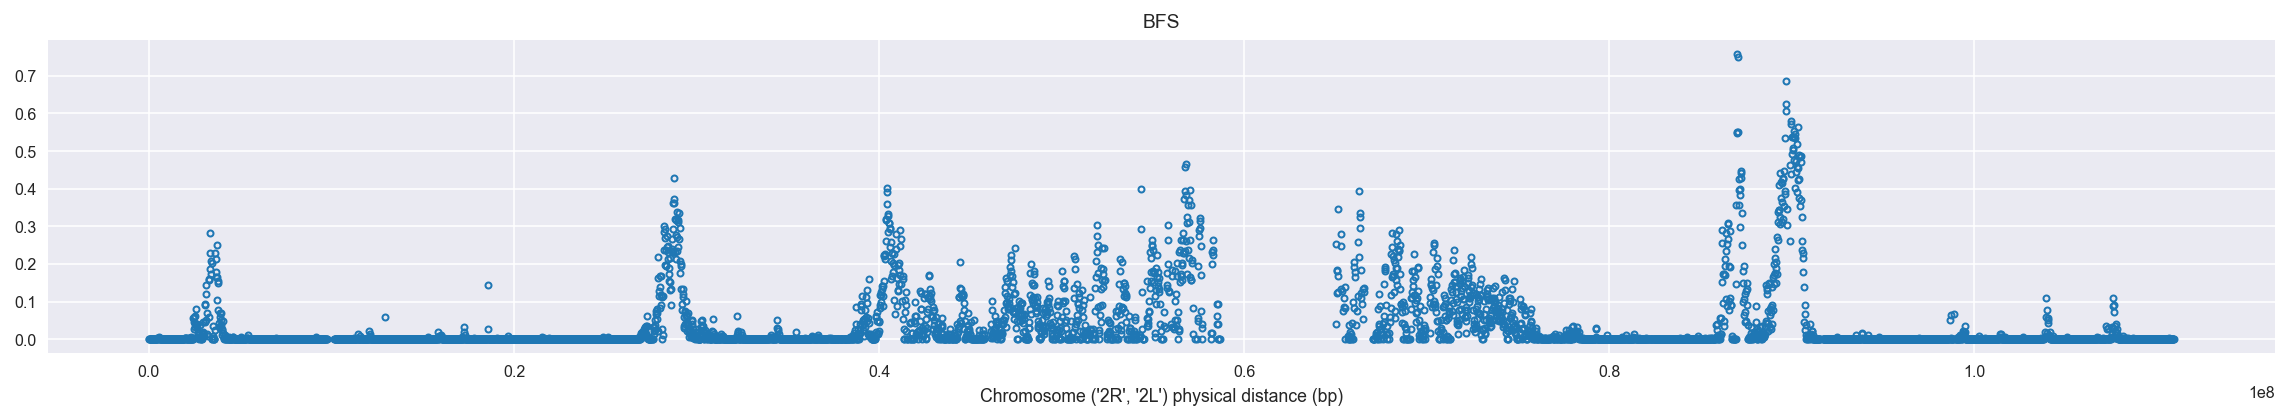

In [5]:
rockies.plot_signal(df_ihs, col='BFS', chrom=('2R', '2L'), recmap=recmap);

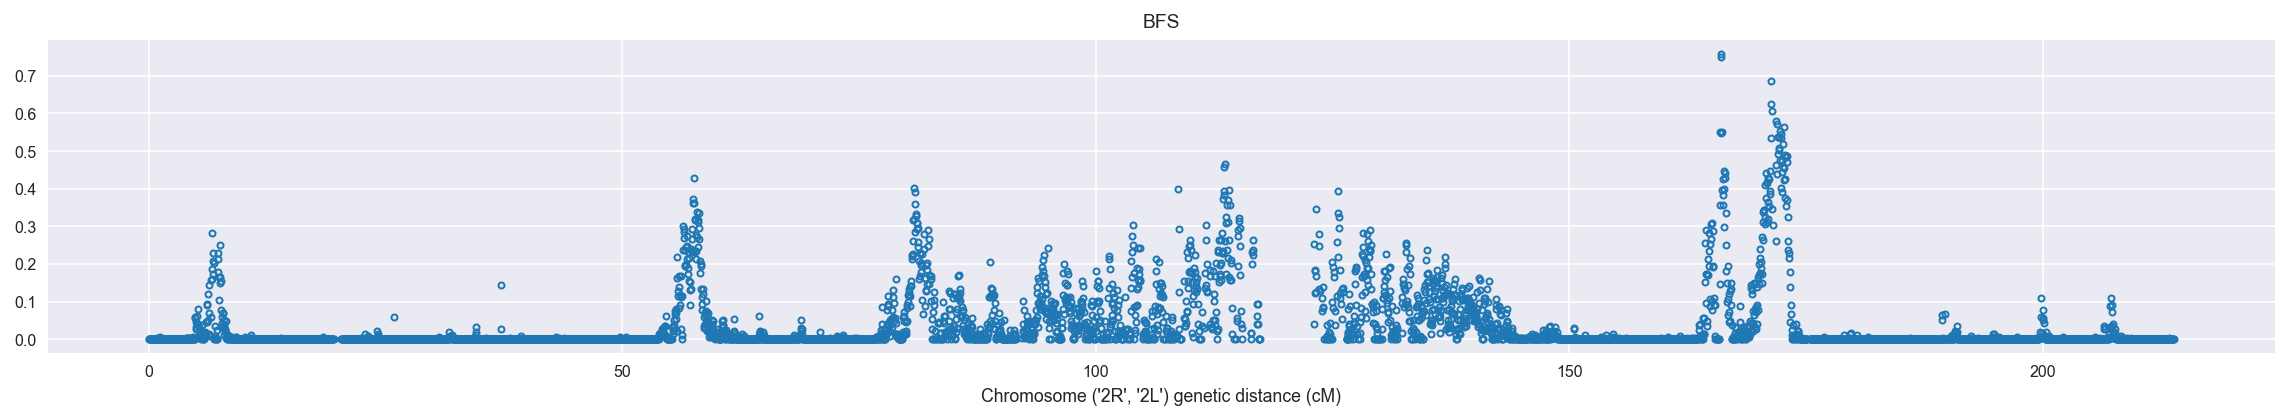

In [6]:
rockies.plot_signal(df_ihs, col='BFS', chrom=('2R', '2L'), recmap=recmap, distance='genetic');

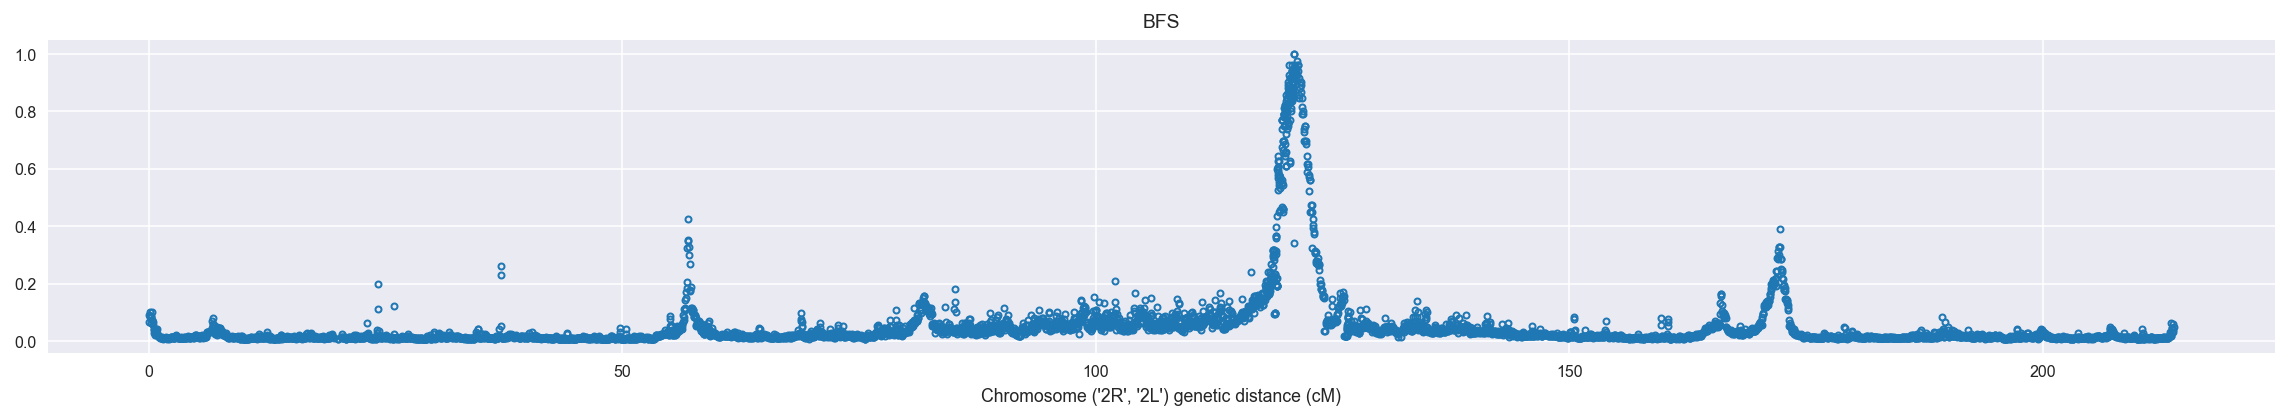

In [6]:
# compare with H12
rockies.plot_signal(df_h12, col='BFS', chrom=('2R', '2L'), recmap=recmap, distance='genetic');

## Check peak fitters

In [8]:
starts, stops, gpos, signal = rockies.extract_signal(df_ihs, col='BFS', chrom=('2R', '2L'), recmap=recmap)
missing = np.isnan(signal)

In [9]:
3e6 * 2e-6

6.0

In [10]:
# This fits each flank independently and returns delta AIC as minimum of the two 
# flanks - better at excluding edge effects.
pairexp_fitter = rockies.PairExponentialPeakFitter(
    amplitude=lmfit.Parameter(value=0.5, vary=True, min=0),
    decay=lmfit.Parameter(value=0.2, vary=True, min=0.1),
    c=lmfit.Parameter(value=.04, vary=True, min=0, max=0.2),
    cap=lmfit.Parameter(value=1, vary=False)
)

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 40
    # data points      = 148
    # variables        = 3
    chi-square         = 0.162
    reduced chi-square = 0.001
    Akaike info crit   = -1003.037
    Bayesian info crit = -994.045
[[Variables]]
    amplitude:   0.17305533 +/- 0.015885 (9.18%) (init= 0.5)
    decay:       0.79463499 +/- 0.124923 (15.72%) (init= 0.2)
    c:           5.8167e-12 +/- 6.00e-05 (1032151712.08%) (init= 0.04)
    cap:         1 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(decay, c)                  =  0.597 
    C(amplitude, decay)          = -0.579 

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 62
    # data points      = 151
    # variables        = 3
    chi-square         = 0.189
    reduced chi-square = 0.001
    Akaike info crit   = -1002.999
    Bayesian info crit = -993.947
[[Variables]]
    amplitude:   0.10465046 +/- 0.013606 (13.00%) (init= 0.5)
    decay:  

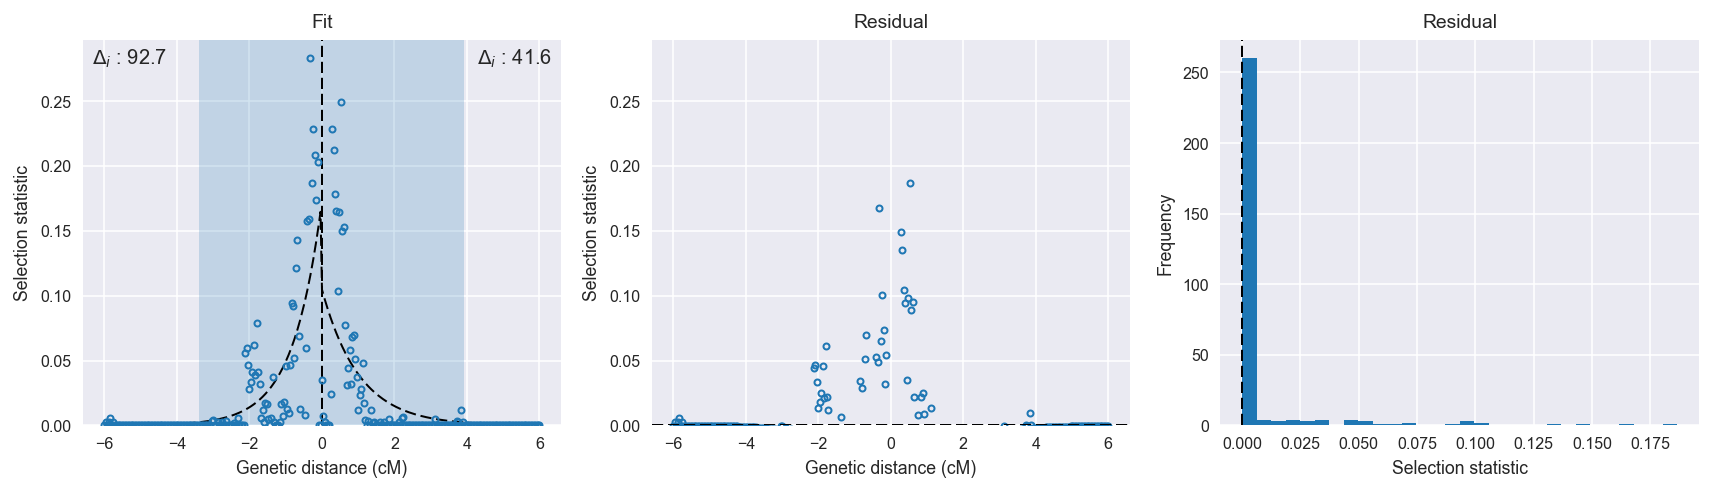

In [16]:
x, y, center, flank = gpos[~missing], signal[~missing], 7, 6
fit = pairexp_fitter.fit(x, y, center, flank)
rockies.plot_peak(fit)
print(fit.peak_result[0].fit_report())
print(fit.peak_result[1].fit_report())
print(fit.null_result[0].fit_report())
print(fit.null_result[1].fit_report())

### Cyp6p

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 51
    # data points      = 147
    # variables        = 3
    chi-square         = 0.201
    reduced chi-square = 0.001
    Akaike info crit   = -963.543
    Bayesian info crit = -954.572
[[Variables]]
    amplitude:   0.28120127 +/- 0.014636 (5.20%) (init= 0.5)
    decay:       0.97061555 +/- 0.099040 (10.20%) (init= 0.2)
    c:           3.6399e-09 +/- 0.005003 (137469791.37%) (init= 0.04)
    cap:         1 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(decay, c)                  = -0.665 
    C(amplitude, decay)          = -0.489 

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 47
    # data points      = 149
    # variables        = 3
    chi-square         = 0.542
    reduced chi-square = 0.004
    Akaike info crit   = -830.878
    Bayesian info crit = -821.866
[[Variables]]
    amplitude:   0.33185279 +/- 0.020960 (6.32%) (init= 0.5)
    decay:      

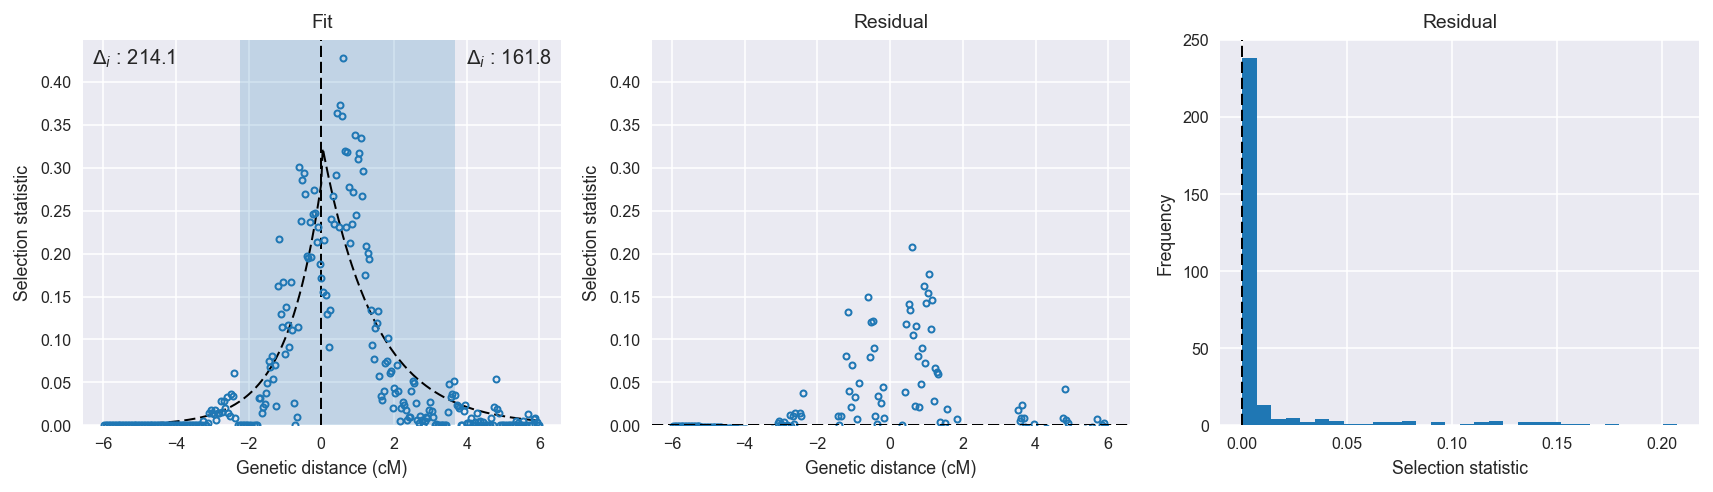

In [11]:
x, y, center, flank = gpos[~missing], signal[~missing], 57, 6
fit = pairexp_fitter.fit(x, y, center, flank)
rockies.plot_peak(fit)
print(fit.peak_result[0].fit_report())
print(fit.peak_result[1].fit_report())
print(fit.null_result[0].fit_report())
print(fit.null_result[1].fit_report())

## Equally-accessible windows

In [3]:
chrom = '2R'

In [4]:
is_accessible = phase1_ar3.accessibility['2R/is_accessible'][:]

In [5]:
windows_eqaccess = allel.equally_accessible_windows(is_accessible=is_accessible, size=20000)

In [6]:
windows_eqaccess.shape

(2011, 2)

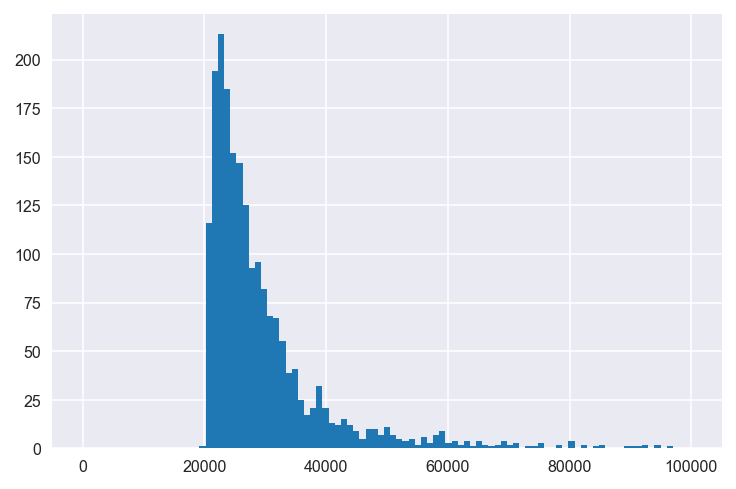

In [26]:
plt.hist(np.diff(windows_eqaccess, axis=1), bins=np.linspace(0, 100000, 100));

In [9]:
grp = ihs_raw['2R/BFS']
grp

Group(/2R/BFS, 7)
  arrays: 7; AC, AF, CHROM, POS, iHS, iHS_chrom_std, iHS_gw_std
  store: DirectoryStore

In [10]:
pos = grp['POS'][:]

In [16]:
signal = np.abs(grp['iHS_gw_std'][:])

In [17]:
wy, _, _ = allel.windowed_statistic(pos, signal, statistic=np.nanmax, windows=windows_eqaccess)

/home/aliman/src/github/malariagen/agam-selection-atlas/deps/conda/envs/agam-selection-atlas/lib/python3.6/site-packages/allel/stats/window.py:366: RuntimeWarning: All-NaN slice encountered
  s = statistic(wv)


In [18]:
wx = np.mean(windows_eqaccess, axis=1)

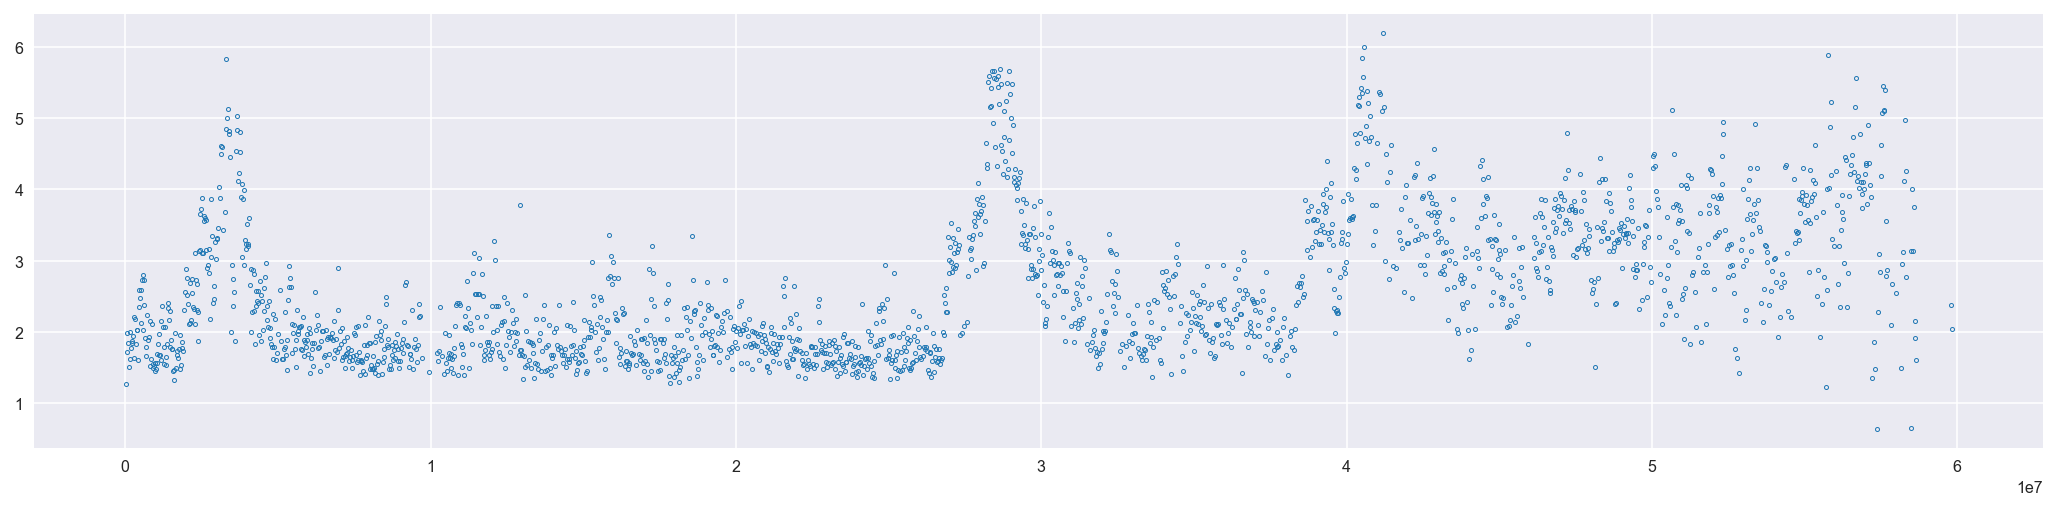

In [19]:
fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(wx, wy, marker='o', linestyle=' ', markersize=2, mfc='none', mew=.5);